# A Crash Course in R

R is a dynamically typed garbage collected language designed by statisticians for statisticians. It is ugly, inconsistent, and slow. BUT it is efficient to write code in R and one can complete tasks far faster than most general purpose languages such as python.

In [66]:
xs <- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",sep=';')
ys <- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=';')
zs <- rbind(xs,ys)
N  <- nrow(zs)
train <- sample(1:N,0.8*N)
test  <- -train
trainSet <- zs[train,]
testSet  <- zs[test,]

In [268]:
model <- lm(quality ~ . , data=trainSet)
predicted <- trunc(predict(model,testSet))
results <- data.frame(real=testSet$quality,predicted)
head(results)

,real,predicted
3,6,5
8,6,5
10,6,5
12,5,5
15,5,5
22,7,5


## Python vs R

Python is a general purpose programming language, and R is not.  Python has a lot of packages that deals with data analysis, but R is designed from bottom up for data tasks and statistical analysis.

* Both R and python are good for data analysis for moderately and annoyingly large sized data.
* Both R and python are good for exploratory data analysis via a REPL.
* R code tend to be more compact than python code.
* Python is good for writing *glue code* and *front ends*
* If you need solve a data task involving a large dataset, then neither R or python is a good option.

## Basic types

R has the standard basic objects every language has

* integers
* floating point numbers
* strings
* vectors
* lists
* hash maps

In [287]:
1
1.0
'this is a string'
c(1,2,3,8)
list(1,3,8)

[1] 1

[1] 1

[1] "this is a string"

[1] 1 2 3 8

[[1]]
[1] 1

[[2]]
[1] 3

[[3]]
[1] 8

In [47]:
xs <- list(a=1,b=2,c=3)
xs[1]
xs$b
xs['c']

$a
[1] 1

[1] 2

$c
[1] 3

## Data frames

Data frames are special data structures for R. You can think of them as arrays whose rows and columns have names:

In [295]:
airquality[c(5,6,11,67),1]

[1] NA 28  7 40

In [270]:
head(airquality)
airquality[!is.na(airquality['Ozone']),]

Ozone,Solar.R,Wind,Temp,Month,Day
41,190,7.4,67,5,1
36,118,8.0,72,5,2
12,149,12.6,74,5,3
18,313,11.5,62,5,4
NA,NA,14.3,56,5,5
28,NA,14.9,66,5,6


,Ozone,Solar.R,Wind,Temp,Month,Day
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
6,28,NA,14.9,66,5,6
7,23,299,8.6,65,5,7
8,19,99,13.8,59,5,8
9,8,19,20.1,61,5,9
11,7,NA,6.9,74,5,11
12,16,256,9.7,69,5,12


In [296]:
library(help = "datasets")

## Control structures

For and while loops, if-else branching:

In [297]:
n <- 13
x <- if(n %% 3 == 0) {
        'a'
     } else if( n%% 3 == 1) {
        'b'
     } else {
        'c'
     }
x

[1] "b"

In [298]:
fibonacci <- c(1,1)
a <- 1
b <- 1
i <- 0
while(i < 30) {
    i <- i+1
    x <- a+b
    a <- b
    b <- x
    fibonacci <- c(fibonacci,x)
}

fibonacci

[1]       1       1       2       3       5       8      13      21      34
[10]      55      89     144     233     377     610     987    1597    2584
[19]    4181    6765   10946   17711   28657   46368   75025  121393  196418
[28]  317811  514229  832040 1346269 2178309

In [88]:
fibonacci <- c(1,1)
a <- 1
b <- 1
for(i in 1:30) {
    x <- a+b
    a <- b
    b <- x
    fibonacci <- c(fibonacci,x)
}

fibonacci

[1]       1       1       2       3       5       8      13      21      34
[10]      55      89     144     233     377     610     987    1597    2584
[19]    4181    6765   10946   17711   28657   46368   75025  121393  196418
[28]  317811  514229  832040 1346269 2178309

## Functions

Like every programming language, R has a construction for constructing functions:

In [300]:
fibonacci <- function(n){
    res <- c(1,1)
    a <- 1
    b <- 1
    for(i in 1:n-2) {
        x <- a+b
        a <- b
        b <- x
        res <- c(res,x)
    }
    res
}

fibonacci(12)

[1]   1   1   2   3   5   8  13  21  34  55  89 144 233 377

In [302]:
lm

function (formula, data, subset, weights, na.action, method = "qr", 
    model = TRUE, x = FALSE, y = FALSE, qr = TRUE, singular.ok = TRUE, 
    contrasts = NULL, offset, ...) 
{
    ret.x <- x
    ret.y <- y
    cl <- match.call()
    mf <- match.call(expand.dots = FALSE)
    m <- match(c("formula", "data", "subset", "weights", "na.action", 
        "offset"), names(mf), 0L)
    mf <- mf[c(1L, m)]
    mf$drop.unused.levels <- TRUE
    mf[[1L]] <- quote(stats::model.frame)
    mf <- eval(mf, parent.frame())
    if (method == "model.frame") 
        return(mf)
    else if (method != "qr") 
        warning(gettextf("method = '%s' is not supported. Using 'qr'", 
            method), domain = NA)
    mt <- attr(mf, "terms")
    y <- model.response(mf, "numeric")
    w <- as.vector(model.weights(mf))
    if (!is.null(w) && !is.numeric(w)) 
        stop("'weights' must be a numeric vector")
    offset <- as.vector(model.offset(mf))
    if (!is.null(offset)) {
        if (length(offset) != NROW(y)) 
            stop(gettextf("number of offsets is %d, should equal %d (number of observations)", 
                length(offset), NROW(y)), domain = NA)
    }
    if (is.empty.model(mt)) {
        x <- NULL
        z <- list(coefficients = if (is.matrix(y)) matrix(, 0, 
            3) else numeric(), residuals = y, fitted.values = 0 * 
            y, weights = w, rank = 0L, df.residual = if (!is.null(w)) sum(w != 
            0) else if (is.matrix(y)) nrow(y) else length(y))
        if (!is.null(offset)) {
            z$fitted.values <- offset
            z$residuals <- y - offset
        }
    }
    else {
        x <- model.matrix(mt, mf, contrasts)
        z <- if (is.null(w)) 
            lm.fit(x, y, offset = offset, singular.ok = singular.ok, 
                ...)
        else lm.wfit(x, y, w, offset = offset, singular.ok = singular.ok, 
            ...)
    }
    class(z) <- c(if (is.matrix(y)) "mlm", "lm")
    z$na.action <- attr(mf, "na.action")
    z$offset <- offset
    z$contrasts <- attr(x, "contrasts")
    z$xlevels <- .getXlevels(mt, mf)
    z$call <- cl
    z$terms <- mt
    if (model) 
        z$model <- mf
    if (ret.x) 
        z$x <- x
    if (ret.y) 
        z$y <- y
    if (!qr) 
        z$qr <- NULL
    z
}
<bytecode: 0x55ceaf7357f0>
<environment: namespace:stats>

## Mapping, filtering and reducing

Most functions in R are **vectorized**

In [261]:
xs <- pi*((1/50)*(0:100)+1.5)
xs
xs <- pi*seq(1.5,3.5,0.02)
xs
sum(sin(xs))*pi/50

[1]  4.712389  4.775221  4.838053  4.900885  4.963716  5.026548  5.089380
  [8]  5.152212  5.215044  5.277876  5.340708  5.403539  5.466371  5.529203
 [15]  5.592035  5.654867  5.717699  5.780530  5.843362  5.906194  5.969026
 [22]  6.031858  6.094690  6.157522  6.220353  6.283185  6.346017  6.408849
 [29]  6.471681  6.534513  6.597345  6.660176  6.723008  6.785840  6.848672
 [36]  6.911504  6.974336  7.037168  7.099999  7.162831  7.225663  7.288495
 [43]  7.351327  7.414159  7.476991  7.539822  7.602654  7.665486  7.728318
 [50]  7.791150  7.853982  7.916813  7.979645  8.042477  8.105309  8.168141
 [57]  8.230973  8.293805  8.356636  8.419468  8.482300  8.545132  8.607964
 [64]  8.670796  8.733628  8.796459  8.859291  8.922123  8.984955  9.047787
 [71]  9.110619  9.173451  9.236282  9.299114  9.361946  9.424778  9.487610
 [78]  9.550442  9.613274  9.676105  9.738937  9.801769  9.864601  9.927433
 [85]  9.990265 10.053096 10.115928 10.178760 10.241592 10.304424 10.367256
 [92] 10.430088 10.492919 10.555751 10.618583 10.681415 10.744247 10.807079
 [99] 10.869911 10.932742 10.995574

[1]  4.712389  4.775221  4.838053  4.900885  4.963716  5.026548  5.089380
  [8]  5.152212  5.215044  5.277876  5.340708  5.403539  5.466371  5.529203
 [15]  5.592035  5.654867  5.717699  5.780530  5.843362  5.906194  5.969026
 [22]  6.031858  6.094690  6.157522  6.220353  6.283185  6.346017  6.408849
 [29]  6.471681  6.534513  6.597345  6.660176  6.723008  6.785840  6.848672
 [36]  6.911504  6.974336  7.037168  7.099999  7.162831  7.225663  7.288495
 [43]  7.351327  7.414159  7.476991  7.539822  7.602654  7.665486  7.728318
 [50]  7.791150  7.853982  7.916813  7.979645  8.042477  8.105309  8.168141
 [57]  8.230973  8.293805  8.356636  8.419468  8.482300  8.545132  8.607964
 [64]  8.670796  8.733628  8.796459  8.859291  8.922123  8.984955  9.047787
 [71]  9.110619  9.173451  9.236282  9.299114  9.361946  9.424778  9.487610
 [78]  9.550442  9.613274  9.676105  9.738937  9.801769  9.864601  9.927433
 [85]  9.990265 10.053096 10.115928 10.178760 10.241592 10.304424 10.367256
 [92] 10.430088 10.492919 10.555751 10.618583 10.681415 10.744247 10.807079
 [99] 10.869911 10.932742 10.995574

[1] -0.06283185

R has powerful syntactic constructions to filter, map, and reduce data:

In [113]:
xs >= 2.0 & xs <= 3.0

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [37]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [49]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [61]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [73]  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE

In [114]:
ys <- xs[ xs >= 2.0 & xs <= 3.0 ]
ys

[1] 2.00 2.02 2.04 2.06 2.08 2.10 2.12 2.14 2.16 2.18 2.20 2.22 2.24 2.26 2.28
[16] 2.30 2.32 2.34 2.36 2.38 2.40 2.42 2.44 2.46 2.48 2.50 2.52 2.54 2.56 2.58
[31] 2.60 2.62 2.64 2.66 2.68 2.70 2.72 2.74 2.76 2.78 2.80 2.82 2.84 2.86 2.88
[46] 2.90 2.92 2.94 2.96 2.98 3.00

In [116]:
ys <- Filter(function(x) x>= 2.0 & x<= 3.0, xs)
ys

[1] 2.00 2.02 2.04 2.06 2.08 2.10 2.12 2.14 2.16 2.18 2.20 2.22 2.24 2.26 2.28
[16] 2.30 2.32 2.34 2.36 2.38 2.40 2.42 2.44 2.46 2.48 2.50 2.52 2.54 2.56 2.58
[31] 2.60 2.62 2.64 2.66 2.68 2.70 2.72 2.74 2.76 2.78 2.80 2.82 2.84 2.86 2.88
[46] 2.90 2.92 2.94 2.96 2.98 3.00

In [109]:
Reduce(function(x,y) x+y, Map(function(x) 3*x*x, Filter(function(x) x>= 1.0 & x<= 2.0, xs)))

[1] 707.505

## A larger example



In [303]:
# install.packages("xml2")
library(xml2)

Installing package into ‘/home/kaygun/local/lib/R’
(as ‘lib’ is unspecified)


In [304]:
rawEUR <- read_xml("https://sdw-wsrest.ecb.europa.eu/service/data/EXR/M.CAD.EUR.SP00.A?startPeriod=2001-01-01&endPeriod=2017-12-31")
rawUSD <- read_xml("https://sdw-wsrest.ecb.europa.eu/service/data/EXR/M.USD.EUR.SP00.A?startPeriod=2001-01-01&endPeriod=2017-12-31")

In [305]:
rawEUR

{xml_document}
<GenericData schemaLocation="http://www.sdmx.org/resources/sdmxml/schemas/v2_1/message https://sdw-wsrest.ecb.europa.eu:443/vocabulary/sdmx/2_1/SDMXMessage.xsd http://www.sdmx.org/resources/sdmxml/schemas/v2_1/common https://sdw-wsrest.ecb.europa.eu:443/vocabulary/sdmx/2_1/SDMXCommon.xsd http://www.sdmx.org/resources/sdmxml/schemas/v2_1/data/generic https://sdw-wsrest.ecb.europa.eu:443/vocabulary/sdmx/2_1/SDMXDataGeneric.xsd" xmlns:message="http://www.sdmx.org/resources/sdmxml/schemas/v2_1/message" xmlns:common="http://www.sdmx.org/resources/sdmxml/schemas/v2_1/common" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:generic="http://www.sdmx.org/resources/sdmxml/schemas/v2_1/data/generic">
[1] <message:Header>\n  <message:ID>8bbb85f5-542c-411b-a025-910b5c53f5ac</mes ...
[2] <message:DataSet action="Replace" validFromDate="2018-10-05T14:40:00.625+ ...

In [309]:
dataEUR

          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
2001 1.409782 1.402665 1.416691 1.390263 1.347291 1.301552 1.315336 1.385730
2002 1.413468 1.387980 1.390250 1.400786 1.421009 1.462705 1.532135 1.533318
2003 1.636427 1.629925 1.594300 1.585080 1.601586 1.579776 1.569383 1.556957
2004 1.634629 1.681730 1.631391 1.606825 1.654138 1.649164 1.621968 1.600673
2005 1.605971 1.612755 1.606400 1.599110 1.594182 1.511095 1.473000 1.481935
2006 1.402473 1.372305 1.391887 1.405189 1.417259 1.408905 1.430338 1.433778
2007 1.528477 1.530910 1.547205 1.533416 1.479591 1.429333 1.441727 1.442035
2008 1.486159 1.474014 1.551874 1.596464 1.553043 1.580257 1.597439 1.576495
2009 1.623348 1.593950 1.646950 1.618790 1.571195 1.576109 1.582448 1.552190
2010 1.487945 1.445415 1.388904 1.346695 1.305981 1.267377 1.332200 1.341091
2011 1.327748 1.348435 1.367165 1.383411 1.388450 1.406345 1.363814 1.407091
2012 1.307259 1.319314 1.312109 1.306774 1.291623 1.287443 1.246105 1.231496

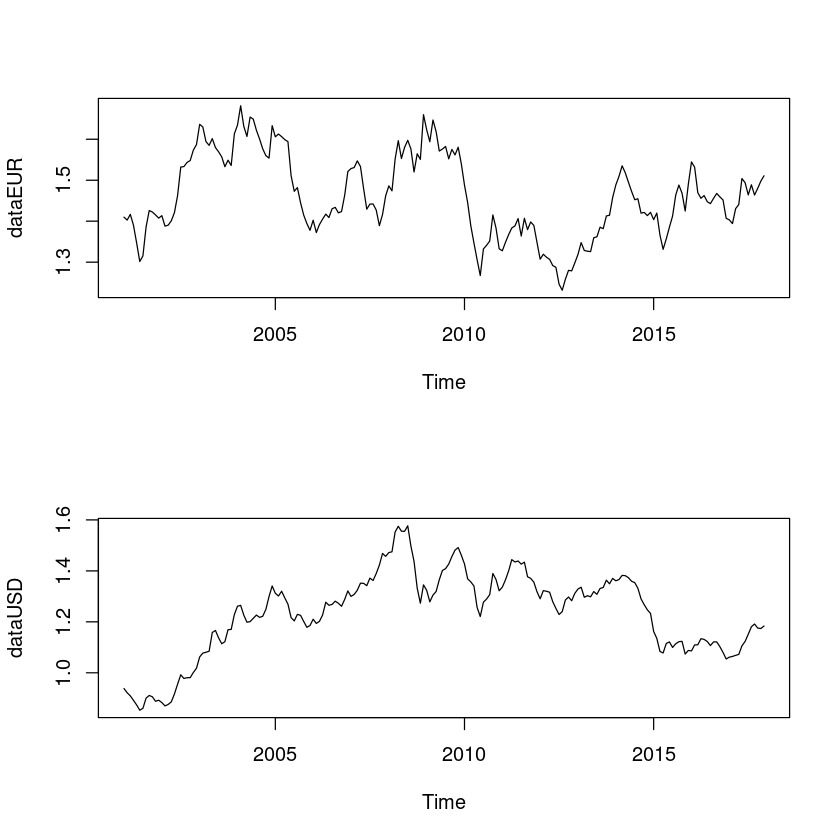

In [311]:
dates <-  as.vector(Map(function(x) xml_attr(x,"value"), xml_find_all(rawEUR,"//generic:ObsDimension")))
 EUR  <- as.numeric(Map(function(x) xml_attr(x,"value"), xml_find_all(rawEUR,"//generic:ObsValue")))
 USD  <- as.numeric(Map(function(x) xml_attr(x,"value"), xml_find_all(rawUSD,"//generic:ObsValue")))
dataEUR  <- ts(EUR, freq=12, start=c(2001,1))
dataUSD  <- ts(USD, freq=12, start=c(2001,1))

par(mfrow=c(2,1))
plot(dataEUR,type="l")
plot(dataUSD,type="l")

In [312]:
drastic <- function(xs){
    ys <- diff(xs)
    dates[c(which.max(ys),which.min(ys))]
}

drastic(dataEUR)
drastic(dataUSD)

[[1]]
[1] "2008-11"

[[2]]
[1] "2005-05"

[[1]]
[1] "2010-09"

[[2]]
[1] "2008-09"

In [319]:
res <- c()
prev <- 0
len <- 1
diff.EUR <- diff(dataEUR)
for(i in 1:length(diff.EUR)){
    if(prev*diff.EUR[i]>=0){
        len <- len + 1
        prev <- diff.EUR[i]
    } else {
        res <- c(res,len)
        len <- 1
    }
}

ind <- sum(res[1:which.max(res)])

In [323]:
length(ss)

[1] 100

In [278]:
# install.packages("dplyr")
library(dplyr)

Installing package into ‘/home/kaygun/local/lib/R’
(as ‘lib’ is unspecified)

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [285]:
mtcars %>% group_by_all(cyl)

ERROR: Error in is_fun_list(.x): object 'cyl' not found


In [286]:
?group_by_all

In [325]:
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [327]:
table(mtcars$cyl)


 4  6  8 
11  7 14 

Warning message in plot.xy(xy, type, ...):
“plot type 'lines' will be truncated to first character”

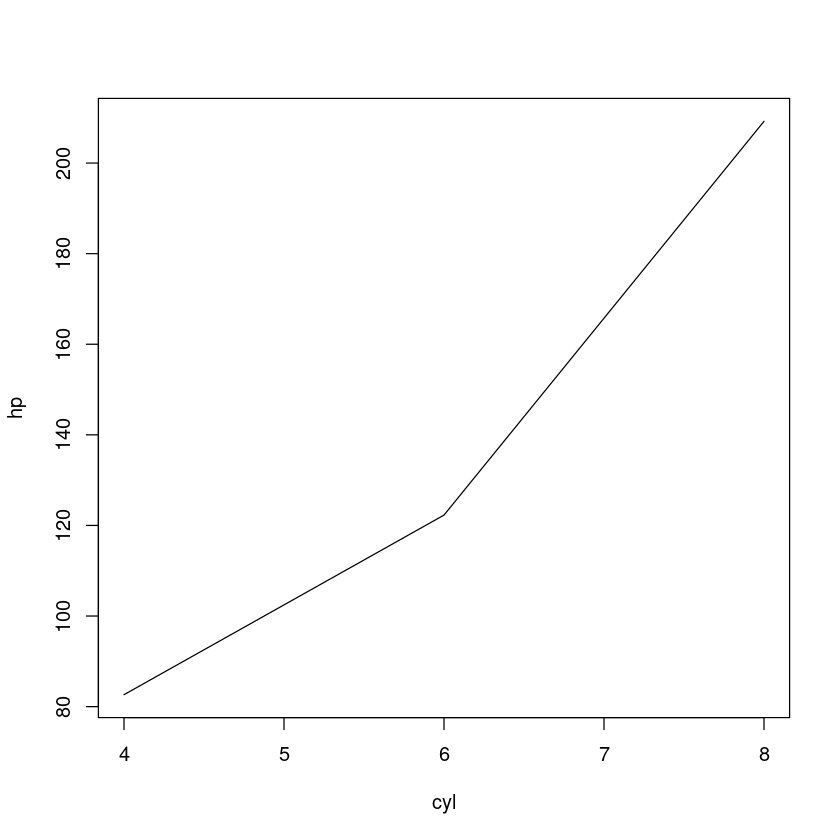

In [330]:
ps <- aggregate(hp ~ cyl, data=mtcars, mean)
plot(ps,type="lines")

In [331]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [332]:
table(iris$Species)


    setosa versicolor  virginica 
        50         50         50 

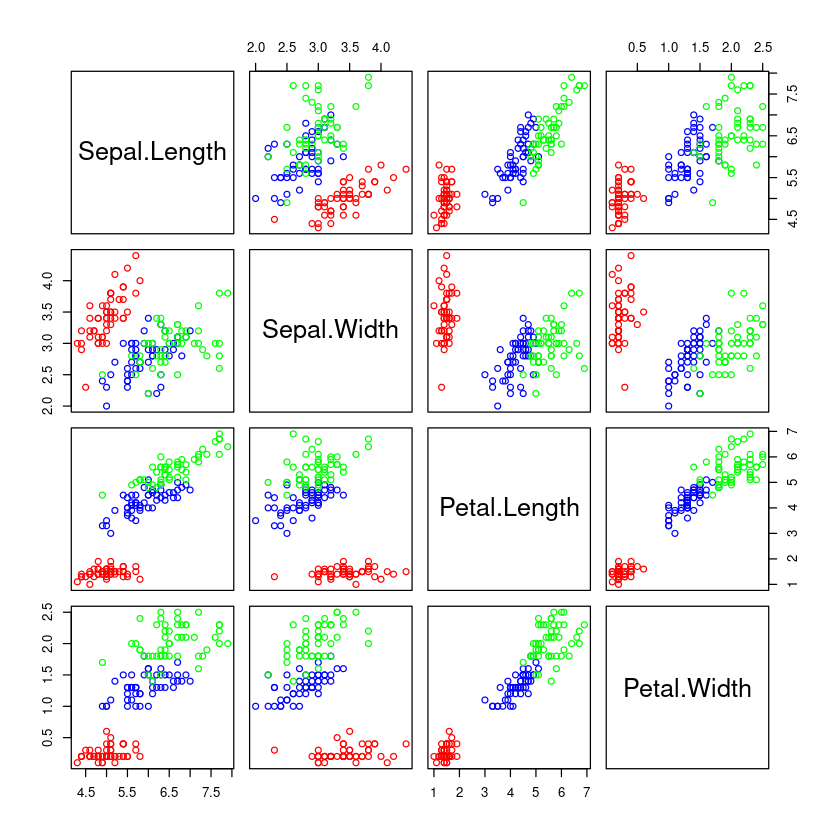

In [340]:
color <- function(x){
    if(x == 'setosa') 
        "red"
    else if(x == 'versicolor')
        "blue"
    else
        "green"
}

pairs(iris[,1:4], col=mapply(color,iris$Species))

In [341]:
fn <- function(k){
    if(k=='setosa')
        1
    else
        0
}

mapply(fn, iris$Species)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[149] 0 0

In [344]:
ddd <- cbind(iris,setosa=mapply(fn, iris$Species))

In [356]:
model <- glm(setosa ~ Sepal.Width + Petal.Length, data=ddd)
predict(model,ddd)

1            2            3            4            5            6 
 0.969744720  0.831515897  0.908606951  0.837362136  0.997390485  1.014929204 
           7            8            9           10           11           12 
 0.942098956  0.920299431  0.803870132  0.837362136  1.003236725  0.898499905 
          13           14           15           16           17           18 
 0.831515897  0.896914472  1.151572594  1.196757078  1.102127305  0.969744720 
          19           20           21           22           23           24 
 0.987283439  1.030882490  0.876700380  1.003236725  1.084588586  0.849054616 
          25           26           27           28           29           30 
 0.833101330  0.787916846  0.898499905  0.947945195  0.942098956  0.843208376 
          31           32           33           34           35           36 
 0.815562611  0.920299431  1.113819784  1.163265074  0.837362136  0.930406476 
          37           38           39           40           41           42 
 0.991544246  0.997390485  0.853315422  0.920299431  0.991544246  0.659795068 
          43           44           45           46           47           48 
 0.908606951  0.926145670  0.943684389  0.831515897  1.009082965  0.886807426 
          49           50           51           52           53           54 
 1.003236725  0.914453191  0.167423098  0.211022148  0.096178283  0.071207891 
          55           56           57           58           59           60 
 0.078639564  0.100439089  0.195068863  0.251450331  0.106285329  0.203590475 
          61           62           63           64           65           66 
 0.097268222  0.221129194  0.043562126  0.084485804  0.324280580  0.205175909 
          67           68           69           70           71           72 
 0.155730619  0.159991425 -0.065435499  0.148298945  0.145623573  0.209436715 
          73           74           75           76           77           78 
-0.069696306  0.056840039  0.171683904  0.177530144  0.035040514  0.046732993 
          79           80           81           82           83           84 
 0.128084854  0.263142811  0.142452706  0.164252231  0.203590475 -0.058003826 
          85           86           87           88           89           90 
 0.155730619  0.266313678  0.139777333 -0.015990210  0.242928719  0.126499420 
          91           92           93           94           95           96 
 0.066947085  0.133931094  0.154145185  0.223804566  0.138191900  0.221129194 
          97           98           99          100          101          102 
 0.193483429  0.171683904  0.344494671  0.187637190 -0.088324963 -0.058003826 
         103          104          105          106          107          108 
-0.149462733 -0.111709922 -0.127663208 -0.302059408  0.017501795 -0.264306598 
         109          110          111          112          113          114 
-0.265892031 -0.027187194  0.080224998 -0.101602876 -0.062264632 -0.091495831 
         115          116          117          118          119          120 
-0.030358061  0.036625947 -0.062264632 -0.102692815 -0.478041043 -0.174433125 
         121          122          123          124          125          126 
-0.050572153  0.013240989 -0.379150463 -0.014404776 -0.022926388 -0.115970728 
         127          128          129          130          131          132 
 0.035040514  0.068532518 -0.139355687 -0.127663208 -0.248353312 -0.037294240 
         133          134          135          136          137          138 
-0.139355687 -0.030358061 -0.194647216 -0.193061783  0.026518902 -0.034618868 
         139          140          141          142          143          144 
 0.090332043 -0.012819342 -0.056418393  0.052579233 -0.058003826 -0.094171203 
         145          146          147          148          149          150 
-0.022926388  0.003133943 -0.091495831  0.003133943  0.070117952  0.024933468

In [355]:
table(real=ddd$setosa,predicted=mapply(function(x) if(x<=0.15) 0 else 1, predict(model,ddd)))

    predicted
real  0  1
   0 74 26
   1  0 50